In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely import geometry as gm
from sklearn.preprocessing import MinMaxScaler
import warnings
import matplotlib as plot
from sklearn.cluster import KMeans
import numpy as np
import random as rnd
warnings.filterwarnings('ignore')

In [2]:
points = gpd.read_file(r"SampleShapeFile/shape/points.shp")
points=points.to_crs('epsg:32644')
roads = gpd.read_file(r"SampleShapeFile/shape/roads.shp")
roads=roads.to_crs('epsg:32644')

In [3]:
#o
hospitals= gpd.GeoDataFrame(points.loc[[1]],crs={'init':'epsg:32644'})
j=0
for i in range(len(points)): 
    if points.loc[i]['type'] == "hospital":
        hospitals=hospitals.append(points.loc[i])

<AxesSubplot:>

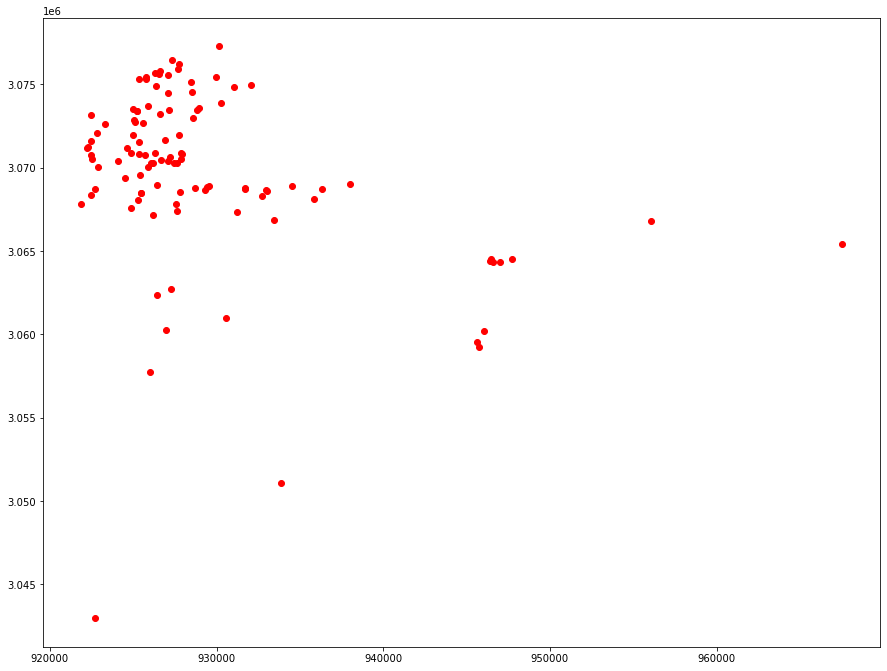

In [4]:
figure,ax1 = plt.subplots(figsize=(15,15))
hospitals.plot(ax=ax1,color='red')

In [5]:
buffer_zone1=hospitals.buffer(5000)

<AxesSubplot:>

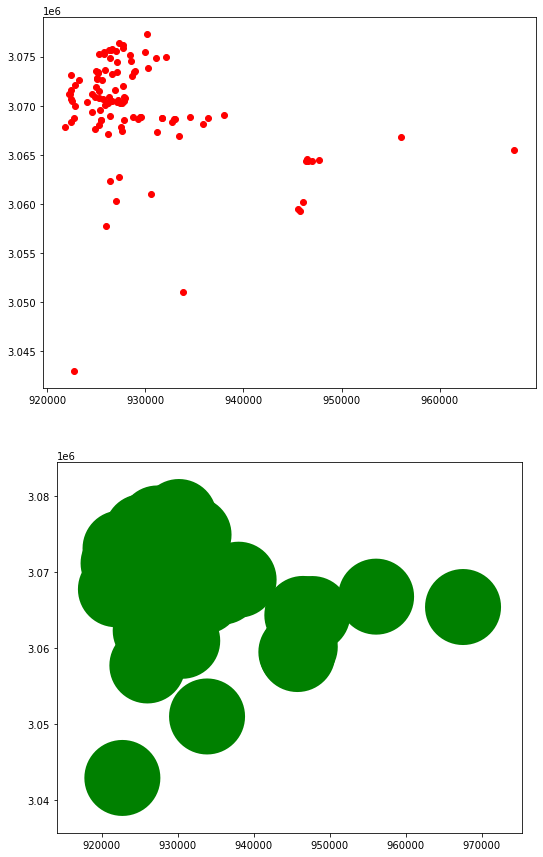

In [6]:
figure,(ax1,ax2)=plt.subplots(2,figsize=(15,15))
hospitals.plot(ax=ax1,color='red')
hospitals.plot(ax=ax2,color='blue')
buffer_zone1.plot(ax=ax2,color='green')

In [7]:
total_area=sum(buffer_zone1.area)

In [8]:
buffer_zone1=gpd.GeoDataFrame(geometry=gpd.GeoSeries(buffer_zone1))

In [9]:
buffer_zone1.drop_duplicates(inplace=True)

In [10]:
index = pd.Index(range(0,107))
buffer_zone1=buffer_zone1.set_index(index)
buffer_zone1


geometry
0    POLYGON ((940856.281 3068130.457, 940832.205 3...
1    POLYGON ((930220.208 3073407.789, 930196.131 3...
2    POLYGON ((950735.389 3059262.432, 950711.313 3...
3    POLYGON ((928278.237 3072617.774, 928254.161 3...
4    POLYGON ((951563.950 3064361.937, 951539.874 3...
..                                                 ...
102  POLYGON ((927433.543 3068372.762, 927409.467 3...
103  POLYGON ((927707.064 3068747.144, 927682.987 3...
104  POLYGON ((931614.902 3073195.150, 931590.826 3...
105  POLYGON ((951474.921 3064538.613, 951450.844 3...
106  POLYGON ((951383.100 3064376.215, 951359.024 3...

[107 rows x 1 columns]

In [11]:
merged=buffer_zone1.loc[[0]]

In [12]:
for i in range(len(buffer_zone1)):
    merged=gpd.overlay(merged,buffer_zone1.loc[[i]],how='union')
    merged['column']=1
    merged=merged.dissolve()
    merged.crs='epsg:32644'

In [14]:
merged

geometry  column
0  MULTIPOLYGON (((927707.715 3042962.110, 927683...       1

In [15]:
olygon=gm.Polygon([[85.271,27.413],[85.868,27.408],[85.877,27.75],[85.272,27.753]])

In [16]:
d = { 'geometry': [olygon]}
rectangle=gpd.GeoDataFrame(d,crs={'init':'epsg:4326'})

<AxesSubplot:>

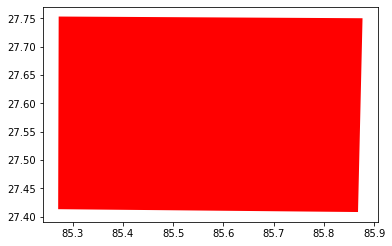

In [17]:
rectangle.plot(color='red')

<AxesSubplot:>

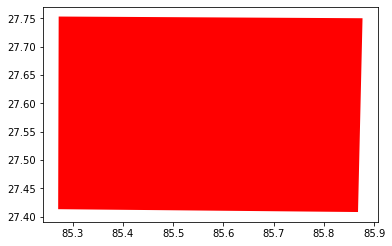

In [18]:
rectangle.plot(color='red')

In [21]:
rectangle=rectangle.to_crs('epsg:32644')

<AxesSubplot:>

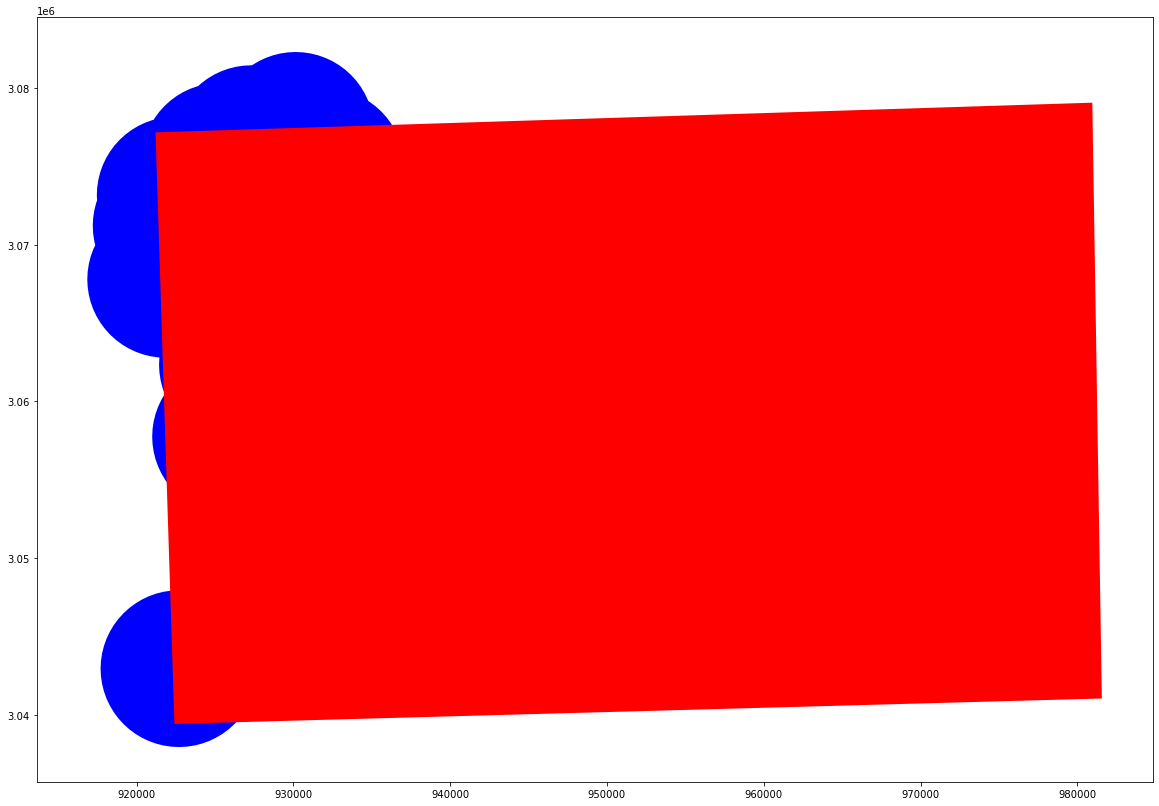

In [22]:
figure,ax=plt.subplots(figsize=(20,20))
merged.plot(ax=ax,color='blue')
rectangle.plot(ax=ax,color="red")

<AxesSubplot:>

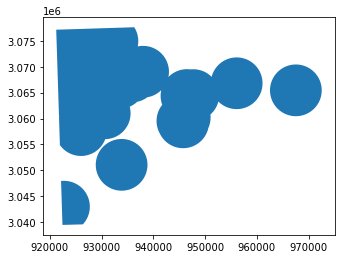

In [23]:
buffer_in_rectangle=gpd.clip(merged,rectangle)
buffer_in_rectangle.plot()

In [24]:
non_buffer=gpd.overlay(rectangle,merged,how='difference')

<AxesSubplot:>

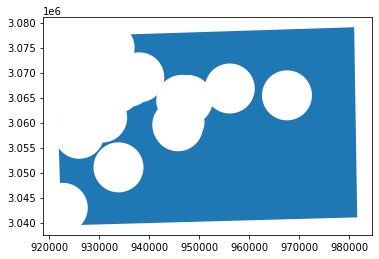

In [25]:
non_buffer.plot()

In [26]:
percentage=(merged.area)/(rectangle.area)*100
print("The percetange of total area with buffer_zone is {}".format(percentage))

The percetange of total area with buffer_zone is 0    42.000346
dtype: float64


In [39]:
buildings = gpd.read_file(r"SampleShapeFile/shape/buildings.shp")

In [40]:
buildings=buildings.to_crs('epsg:32644')
buildings=buildings.iloc[100000:200000]

In [43]:
buildings_in_rectangle=gpd.clip(buildings,rectangle)

In [44]:
buildings

osm_id  name  type  \
100000  337555876  None  None   
100001  337555879  None  None   
100002  337555881  None  None   
100003  337555882  None  None   
100004  337557429  None  None   
...           ...   ...   ...   
199995  342219304  None  None   
199996  342219305  None  None   
199997  342219306  None  None   
199998  342219307  None  None   
199999  342219308  None  None   

                                                 geometry  
100000  POLYGON ((924453.759 3071734.725, 924452.059 3...  
100001  POLYGON ((924419.612 3071751.327, 924418.974 3...  
100002  POLYGON ((924410.497 3071748.753, 924409.213 3...  
100003  POLYGON ((924453.998 3071718.304, 924462.844 3...  
100004  POLYGON ((924870.431 3071242.758, 924875.066 3...  
...                                                   ...  
199995  POLYGON ((969268.803 3062803.145, 969267.498 3...  
199996  POLYGON ((969183.939 3063207.850, 969179.362 3...  
199997  POLYGON ((968159.093 3063142.299, 968150.944 3...  
199998  POLYGON ((969364.968 3063185.503, 969358.819 3...  
199999  POLYGON ((968179.351 3063252.027, 968172.302 3...  

[100000 rows x 4 columns]

In [45]:
buildings_in_rectangle

osm_id  name  type  \
116244  341173069  None  None   
116241  341173059  None  None   
116228  341173012  None  None   
116225  341173007  None  None   
116226  341173008  None  None   
...           ...   ...   ...   
116759  341186888  None  None   
115611  341159605  None  None   
115610  341159603  None  None   
116896  341193593  None  None   
116888  341193568  None  None   

                                                 geometry  
116244                                      POLYGON EMPTY  
116241  POLYGON ((922435.395 3039474.457, 922438.821 3...  
116228  POLYGON ((923548.673 3039477.322, 923553.889 3...  
116225  POLYGON ((923555.960 3039478.740, 923562.740 3...  
116226  POLYGON ((922437.757 3039480.436, 922443.055 3...  
...                                                   ...  
116759  POLYGON ((978214.800 3078961.200, 978219.960 3...  
115611  POLYGON ((978722.821 3078960.969, 978728.068 3...  
115610  POLYGON ((978779.813 3078969.137, 978788.669 3...  
116896  POLYGON ((980837.484 3078973.727, 980840.198 3...  
116888  POLYGON ((980852.101 3078975.253, 980852.756 3...  

[99994 rows x 4 columns]

In [46]:
buildings_in_buffer=gpd.clip(buildings,buffer_in_rectangle)

In [47]:
buildings_in_buffer

osm_id  name  type  \
116244  341173069  None  None   
116241  341173059  None  None   
116228  341173012  None  None   
116225  341173007  None  None   
116226  341173008  None  None   
...           ...   ...   ...   
141233  341552779  None  None   
142306  341562244  None  None   
142304  341562239  None  None   
169282  341838348  None  None   
142307  341562245  None  None   

                                                 geometry  
116244                                      POLYGON EMPTY  
116241  POLYGON ((922435.395 3039474.457, 922438.821 3...  
116228  POLYGON ((923548.673 3039477.322, 923553.889 3...  
116225  POLYGON ((923555.960 3039478.740, 923562.740 3...  
116226  POLYGON ((922437.757 3039480.436, 922443.055 3...  
...                                                   ...  
141233  POLYGON ((935577.024 3077583.103, 935586.343 3...  
142306  POLYGON ((935588.674 3077561.768, 935588.151 3...  
142304  POLYGON ((935625.867 3077586.238, 935632.813 3...  
169282  POLYGON ((935361.230 3077574.142, 935365.247 3...  
142307  POLYGON ((935587.899 3077590.171, 935601.869 3...  

[65532 rows x 4 columns]

In [48]:
percentage_of_buildings_in_buffer=len(buildings_in_buffer)/len(buildings_in_rectangle)*100

In [49]:
print(percentage_of_buildings_in_buffer)

65.53593215592936


<AxesSubplot:>

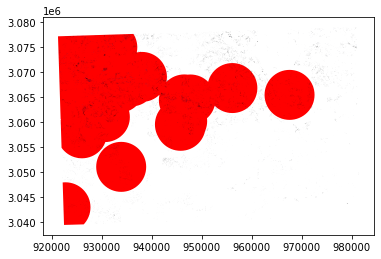

In [53]:
figure,ax=plt.subplots()
buffer_in_rectangle.plot(ax=ax,color="red",markersize=0.001)
buildings.plot(ax=ax,markersize=5)

In [55]:
buildings_outsidse_buffer=gpd.clip(buildings_in_rectangle,non_buffer)

<AxesSubplot:>

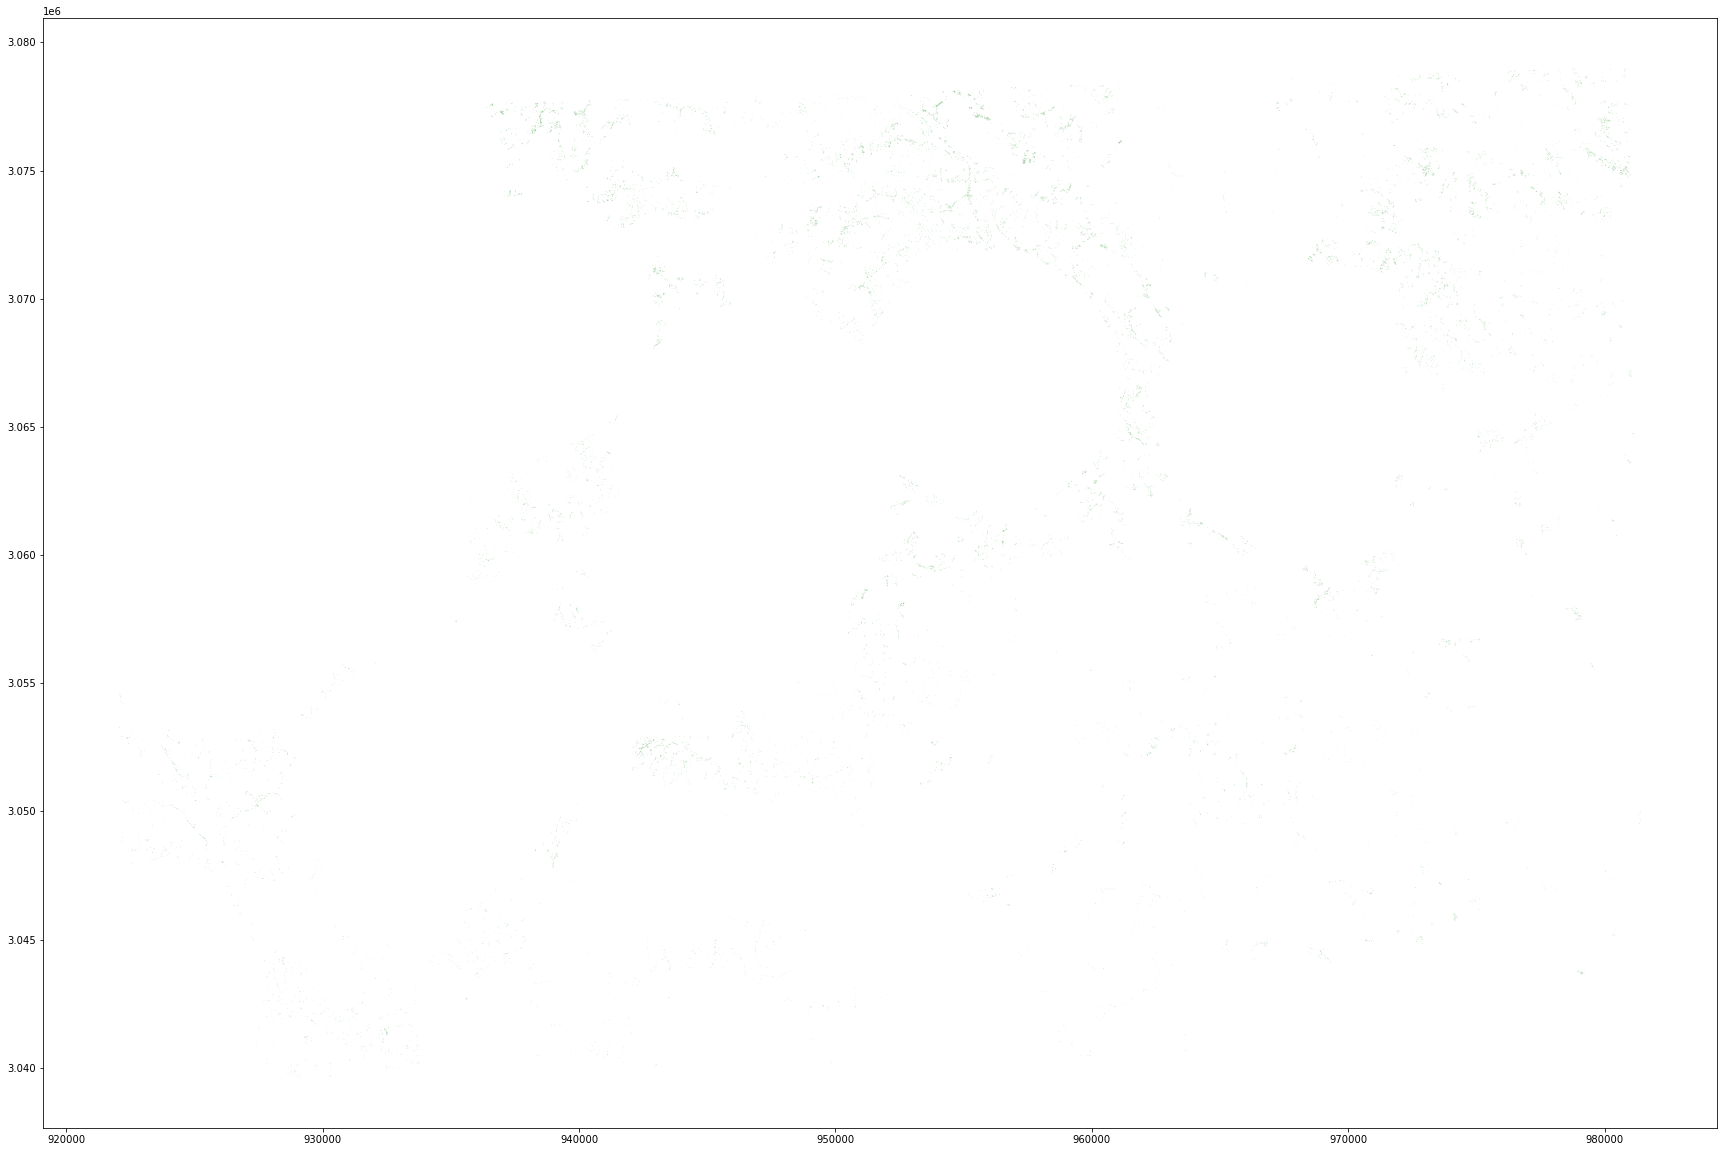

In [63]:
figure,ax1=plt.subplots(figsize=(30,30))
buildings_outsidse_buffer.plot(ax=ax1,color="green",markersize=20000000000000000)

In [64]:
buildings_in_lat=buildings_outsidse_buffer.to_crs("epsg:4326")

In [72]:
buildings_in_lat['geometry']

120305    POLYGON ((85.33793 27.41273, 85.33802 27.41269...
120558    POLYGON ((85.34072 27.41285, 85.34078 27.41281...
110450    POLYGON ((85.35019 27.41266, 85.35016 27.41262...
120553    POLYGON ((85.33748 27.41312, 85.33745 27.41307...
110353    POLYGON ((85.35086 27.41271, 85.35084 27.41270...
                                ...                        
116759    POLYGON ((85.84929 27.75013, 85.84934 27.75013...
115611    POLYGON ((85.85442 27.74995, 85.85448 27.74999...
115610    POLYGON ((85.85500 27.75000, 85.85509 27.75003...
116896    POLYGON ((85.87581 27.74931, 85.87583 27.74927...
116888    POLYGON ((85.87596 27.74932, 85.87596 27.74928...
Name: geometry, Length: 34549, dtype: geometry

<AxesSubplot:>

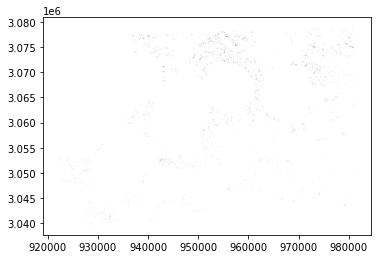

In [83]:
buildings_outsidse_buffer.plot()

In [84]:
buildings_outsidse_buffer['geometry']=buildings_outsidse_buffer['geometry'].centroid

<AxesSubplot:>

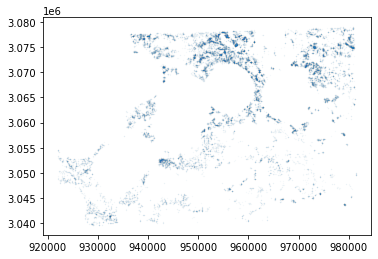

In [85]:
buildings_outsidse_buffer.plot(markersize=0.0002)

In [86]:
buildings_in_lat=buildings_outsidse_buffer.to_crs("epsg:4326")

<AxesSubplot:>

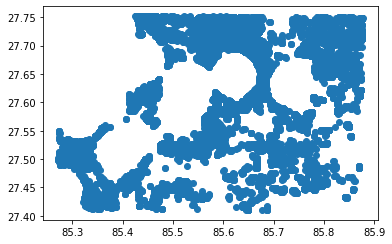

In [87]:
buildings_in_lat.plot()

In [98]:
col1=[]
col2=[]
index=pd.Index(range(len(buildings_in_lat)))
buildings_in_lat=buildings_in_lat.set_index(index)

In [99]:
for i in range(len(buildings_in_lat)):
    x=float(buildings_in_lat['geometry'].loc[[i]].x)
    y=float(buildings_in_lat['geometry'].loc[[i]].y)
    col1.append(x)
    col2.append(y)

In [100]:
d={'x':col1,'y':col2}


In [101]:
data=pd.DataFrame(data=d)

In [102]:
km=KMeans(n_clusters=150)
km.fit(data[['x','y']])
x=km.cluster_centers_
x=pd.DataFrame(x,columns=['x','y'])

In [106]:
x

x          y
0    85.777131  27.686082
1    85.604699  27.726772
2    85.451441  27.573823
3    85.712344  27.562522
4    85.307621  27.496575
..         ...        ...
145  85.553392  27.726207
146  85.794218  27.684922
147  85.826908  27.588447
148  85.864775  27.479104
149  85.783409  27.480695

[150 rows x 2 columns]

In [107]:
x_cord=x['x']
y_cord=x['y']
geometry=[]
for i in range(len(x_cord)):
    x=gm.Point(x_cord[i],y_cord[i])
    geometry.append(x)

In [109]:
geometry

<AxesSubplot:>

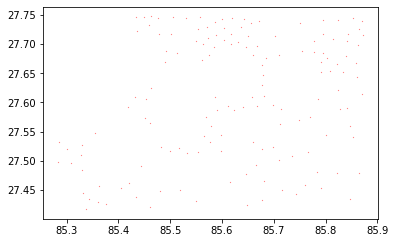

In [113]:
points={'geometry':geometry}
Locations=gpd.GeoDataFrame(points,crs={'init':'epsg:4326'})
Locations.plot(color="red",markersize=0.01)

<AxesSubplot:>

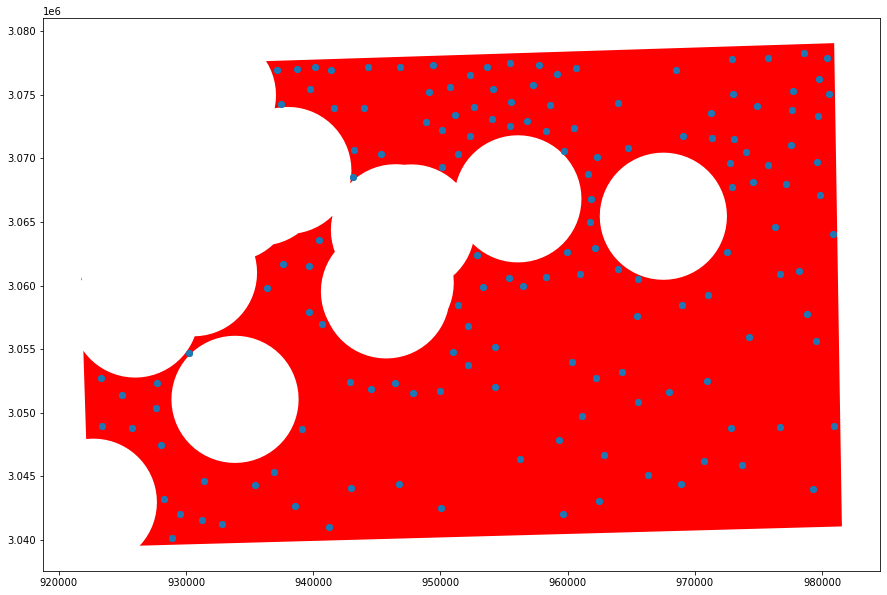

In [119]:
figure,ax=plt.subplots(figsize=(15,15))
non_buffer.plot(ax=ax,color="red")
Locations.to_crs("epsg:32644").plot(ax=ax)

In [136]:
import random as rnd
Locations=Locations.to_crs("epsg:32644")

In [154]:
posi=rnd.randint(0,len(Locations))
buffer=Locations.loc[[posi]].buffer(5000)
loc_in_buffer=gpd.clip(Locations,buffer)

In [155]:
loc_in_buffer=loc_in_buffer.set_index(pd.Index(range(0,len(loc_in_buffer))))
loc_in_buffer

geometry
0   POINT (959706.443 3070611.649)
1   POINT (959706.443 3070611.649)
2   POINT (958312.190 3072108.268)
3   POINT (958312.190 3072108.268)
4   POINT (960474.259 3072386.728)
5   POINT (960474.259 3072386.728)
6   POINT (955492.820 3072533.414)
7   POINT (955492.820 3072533.414)
8   POINT (956785.730 3072913.469)
9   POINT (956785.730 3072913.469)
10  POINT (954079.820 3073126.341)
11  POINT (954079.820 3073126.341)
12  POINT (958627.647 3074156.626)
13  POINT (958627.647 3074156.626)
14  POINT (955539.523 3074421.750)
15  POINT (955539.523 3074421.750)
16  POINT (954161.573 3075438.817)
17  POINT (954161.573 3075438.817)
18  POINT (957283.353 3075759.363)
19  POINT (957283.353 3075759.363)
20  POINT (959165.461 3076612.787)
21  POINT (959165.461 3076612.787)
22  POINT (960662.167 3077080.189)
23  POINT (960662.167 3077080.189)
24  POINT (957749.203 3077374.887)
25  POINT (957749.203 3077374.887)
26  POINT (955467.500 3077456.424)
27  POINT (955467.500 3077456.424)

In [165]:
list_of_points=[]
for i in range(0,len(loc_in_buffer)):
    list_of_points.append((loc_in_buffer.loc[[i]]['geometry']))

<AxesSubplot:>

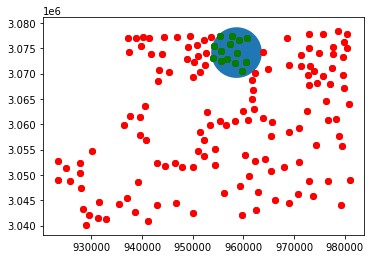

In [162]:
figure,ax=plt.subplots()
buffer.plot(ax=ax)
Locations.plot(ax=ax,color="red")
loc_in_buffer.plot(ax=ax,color="green")

In [163]:
list_of_points

[0    POINT (959706.443 3070611.649)
 Name: geometry, dtype: geometry,
 1    POINT (959706.443 3070611.649)
 Name: geometry, dtype: geometry,
 2    POINT (958312.190 3072108.268)
 Name: geometry, dtype: geometry,
 3    POINT (958312.190 3072108.268)
 Name: geometry, dtype: geometry,
 4    POINT (960474.259 3072386.728)
 Name: geometry, dtype: geometry,
 5    POINT (960474.259 3072386.728)
 Name: geometry, dtype: geometry,
 6    POINT (955492.820 3072533.414)
 Name: geometry, dtype: geometry,
 7    POINT (955492.820 3072533.414)
 Name: geometry, dtype: geometry,
 8    POINT (956785.730 3072913.469)
 Name: geometry, dtype: geometry,
 9    POINT (956785.730 3072913.469)
 Name: geometry, dtype: geometry,
 10    POINT (954079.820 3073126.341)
 Name: geometry, dtype: geometry,
 11    POINT (954079.820 3073126.341)
 Name: geometry, dtype: geometry,
 12    POINT (958627.647 3074156.626)
 Name: geometry, dtype: geometry,
 13    POINT (958627.647 3074156.626)
 Name: geometry, dtype: geometry,
 1

In [167]:
list_of_points[1]

1    POINT (959706.443 3070611.649)
Name: geometry, dtype: geometry

<AxesSubplot:>

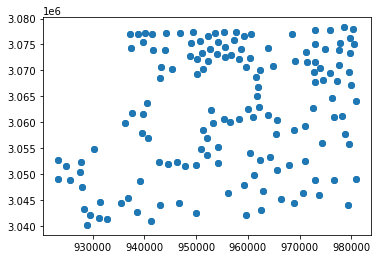

In [170]:
Locations.plot()

In [171]:
Locations

geometry
0    POINT (971366.087 3071572.788)
1    POINT (954161.573 3075438.817)
2    POINT (939641.179 3057909.851)
3    POINT (965489.333 3057612.699)
4    POINT (925719.775 3048835.116)
..                              ...
295  POINT (949097.361 3075187.304)
296  POINT (973059.328 3071509.684)
297  POINT (976708.822 3060927.720)
298  POINT (980931.205 3048937.968)
299  POINT (972869.690 3048800.853)

[300 rows x 1 columns]

In [172]:
Locations.to_file('localities.shp')

In [174]:
buildings.to_file('buildings.shp')

In [175]:
from sklearn.cluster import DBSCAN

In [ ]:
clustering=DBSCAN(eps,min_samples=2).fit()